In [1]:
### Ericsson_ML_Challenge_MaterialType_Prediction

In [2]:
###!mkdir ~/.kaggle

In [3]:
###!cp /kaggle.json ~/.kaggle/

In [4]:
###!chmod 600 ~/.kaggle/kaggle.json

In [5]:
###! pip install kaggle

In [6]:
###!pip install keras-tuner

In [7]:
###!kaggle datasets download -d saranyashalya/ericsson-ml-challenge-materialtype-prediction

In [8]:
###! unzip /content/ericsson-ml-challenge-materialtype-prediction.zip

In [9]:
###! pip install tensorflow

In [10]:
###! pip install bayesian-optimization

In [11]:
####!pip install pandas

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [13]:
##!pip install bayesian-optimization

In [14]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
###from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [15]:
# Import packages
# Basic packages

import pickle
from math import floor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [16]:
train_data = pd.read_csv("/content/train_file.csv")

In [17]:
test_data = pd.read_csv("/content/test_file.csv")

In [18]:
print(train_data.shape, test_data.shape)

(31653, 12) (21102, 11)


In [19]:
train_data.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')

In [20]:
train_data.head(3)

ID UsageClass CheckoutType  CheckoutYear  CheckoutMonth  Checkouts  \
0   1   Physical      Horizon          2005              4          1   
1   2   Physical      Horizon          2005              4          1   
2   3   Physical      Horizon          2005              4          3   

                                               Title               Creator  \
0                                         Tidal wave                   NaN   
1                     London holiday / Richard Peck.  Peck, Richard, 1934-   
2  Cinco de Mayo : celebrating Hispanic pride / C...      Gnojewski, Carol   

                                            Subjects           Publisher  \
0             Tsunamis, Tsunamis Juvenile literature                 NaN   
1                                                NaN             Viking,   
2  Cinco de Mayo Mexican holiday History Juvenile...  Enslow Publishers,   

  PublicationYear MaterialType  
0             NaN         BOOK  
1           1998.         BOOK  
2          c2002.         BOOK

In [21]:
train_data["MaterialType"].value_counts()

BOOK         21707
SOUNDDISC     4149
VIDEOCASS     2751
VIDEODISC     1420
SOUNDCASS     1020
MIXED          347
MUSIC          165
CR              94
Name: MaterialType, dtype: int64

In [22]:
test_data["MaterialType"] = 0

In [23]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

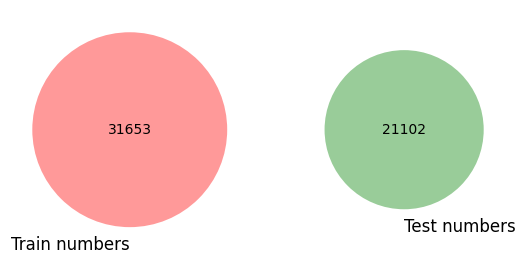

In [24]:
set_numbers_train = set(train_data[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(test_data[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

### The above data explains the `size` of train and test data.

In [25]:
train_data.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')

In [26]:
num_var = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(train_data[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in train_data.columns if feature not in num_var]

In [27]:
print("The Numerical Variables are :", num_var)
print("The Discreate Variables are :", discrete_var)
print("The Continuous Variables are :", cont_var)
print("The Categorical Variables are :", categ_var)

The Numerical Variables are : ['ID', 'CheckoutYear', 'CheckoutMonth', 'Checkouts']
The Discreate Variables are : ['CheckoutYear', 'CheckoutMonth']
The Continuous Variables are : ['ID', 'Checkouts']
The Categorical Variables are : ['UsageClass', 'CheckoutType', 'Title', 'Creator', 'Subjects', 'Publisher', 'PublicationYear', 'MaterialType']


### CHECKING `NULL VALUES` OR NOT

In [28]:
train_data.isnull().sum()

ID                     0
UsageClass             0
CheckoutType           0
CheckoutYear           0
CheckoutMonth          0
Checkouts              0
Title                  0
Creator            23137
Subjects            1763
Publisher          21916
PublicationYear    21931
MaterialType           0
dtype: int64

In [29]:
train_data = train_data.fillna(0)

In [30]:
train_data.isnull().sum()

ID                 0
UsageClass         0
CheckoutType       0
CheckoutYear       0
CheckoutMonth      0
Checkouts          0
Title              0
Creator            0
Subjects           0
Publisher          0
PublicationYear    0
MaterialType       0
dtype: int64

In [31]:
test_data = test_data.fillna(0)

### CATEGORICAL   VARIABLES

In [32]:
train_data.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')

In [33]:
train_data["MaterialType"].value_counts()

BOOK         21707
SOUNDDISC     4149
VIDEOCASS     2751
VIDEODISC     1420
SOUNDCASS     1020
MIXED          347
MUSIC          165
CR              94
Name: MaterialType, dtype: int64

### {0: 'BOOK', 1: 'CR', 2: 'MIXED', 3: 'MUSIC', 4: 'SOUNDCASS', 5: 'SOUNDDISC', 6: 'VIDEOCASS', 7: 'VIDEODISC'}

In [34]:
c = train_data["MaterialType"].astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'BOOK', 1: 'CR', 2: 'MIXED', 3: 'MUSIC', 4: 'SOUNDCASS', 5: 'SOUNDDISC', 6: 'VIDEOCASS', 7: 'VIDEODISC'}


In [35]:
train_data['MaterialType'] = train_data.MaterialType.astype('category').cat.codes

### Analysis For `Numerical` Variables

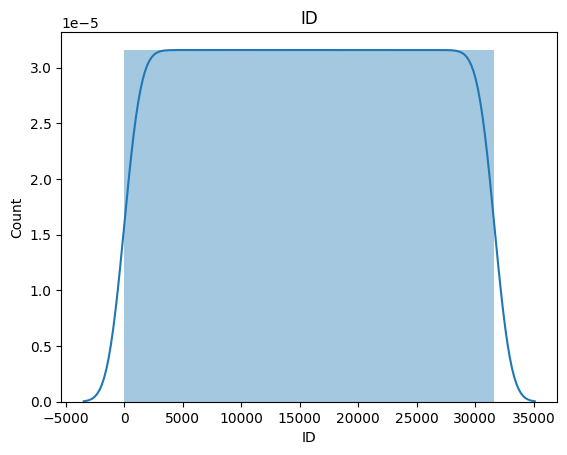

<Figure size 300x300 with 0 Axes>

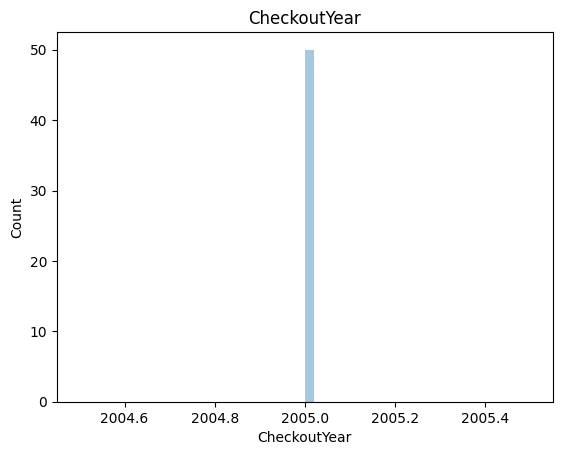

<Figure size 300x300 with 0 Axes>

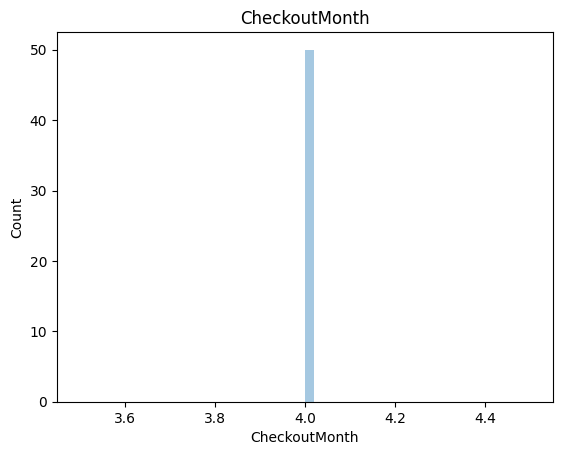

<Figure size 300x300 with 0 Axes>

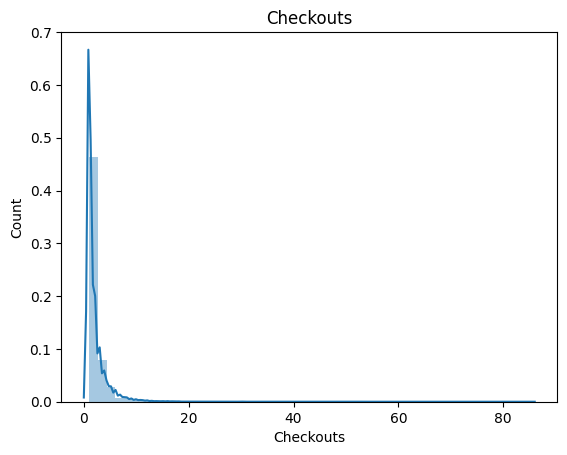

<Figure size 300x300 with 0 Axes>

In [36]:
#import seaborn as sns
#import matplotlib.pyplot as plt

for feature in num_var:
  data=train_data.copy()
  sns.distplot(train_data[feature])
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.figure(figsize=(3,3))
  plt.show()

In [37]:
train_data.head(3)

ID UsageClass CheckoutType  CheckoutYear  CheckoutMonth  Checkouts  \
0   1   Physical      Horizon          2005              4          1   
1   2   Physical      Horizon          2005              4          1   
2   3   Physical      Horizon          2005              4          3   

                                               Title               Creator  \
0                                         Tidal wave                     0   
1                     London holiday / Richard Peck.  Peck, Richard, 1934-   
2  Cinco de Mayo : celebrating Hispanic pride / C...      Gnojewski, Carol   

                                            Subjects           Publisher  \
0             Tsunamis, Tsunamis Juvenile literature                   0   
1                                                  0             Viking,   
2  Cinco de Mayo Mexican holiday History Juvenile...  Enslow Publishers,   

  PublicationYear  MaterialType  
0               0             0  
1           1998.             0  
2          c2002.             0

In [38]:
##! pip install klib

#### Using KLIB Library

In [39]:
import klib

In [40]:
train_data = klib.clean_column_names(train_data)

In [41]:
test_data = klib.clean_column_names(test_data)

In [42]:
train_data = klib.convert_datatypes(train_data)
test_data = klib.convert_datatypes(test_data)

In [43]:
train_data = klib.mv_col_handling(train_data)
test_data = klib.mv_col_handling(test_data)

In [44]:
train_data.dtypes

id                     int16
usage_class         category
checkout_type       category
checkout_year          int16
checkout_month          int8
checkouts               int8
title                 string
creator               object
subjects              object
publisher             object
publication_year    category
material_type           int8
dtype: object

### Data Conversion

In [45]:
train_data.head(2)

id usage_class checkout_type  checkout_year  checkout_month  checkouts  \
0   1    Physical       Horizon           2005               4          1   
1   2    Physical       Horizon           2005               4          1   

                            title               creator  \
0                      Tidal wave                     0   
1  London holiday / Richard Peck.  Peck, Richard, 1934-   

                                 subjects publisher publication_year  \
0  Tsunamis, Tsunamis Juvenile literature         0                0   
1                                       0   Viking,            1998.   

   material_type  
0              0  
1              0

In [46]:
train_data["usage_class"] = train_data["usage_class"].astype('category').cat.codes
test_data["usage_class"] = test_data["usage_class"].astype('category').cat.codes
train_data["checkout_type"] = train_data["checkout_type"].astype('category').cat.codes
test_data["checkout_type"] = test_data["checkout_type"].astype('category').cat.codes


In [47]:
train_data.dtypes

id                     int16
usage_class             int8
checkout_type           int8
checkout_year          int16
checkout_month          int8
checkouts               int8
title                 string
creator               object
subjects              object
publisher             object
publication_year    category
material_type           int8
dtype: object

In [48]:
train_data.head(3)

id  usage_class  checkout_type  checkout_year  checkout_month  checkouts  \
0   1            0              0           2005               4          1   
1   2            0              0           2005               4          1   
2   3            0              0           2005               4          3   

                                               title               creator  \
0                                         Tidal wave                     0   
1                     London holiday / Richard Peck.  Peck, Richard, 1934-   
2  Cinco de Mayo : celebrating Hispanic pride / C...      Gnojewski, Carol   

                                            subjects           publisher  \
0             Tsunamis, Tsunamis Juvenile literature                   0   
1                                                  0             Viking,   
2  Cinco de Mayo Mexican holiday History Juvenile...  Enslow Publishers,   

  publication_year  material_type  
0                0              0  
1            1998.              0  
2           c2002.              0

In [49]:
import re
def publication_year(s):
    '''
    '''
    k = re.findall(r'\d{4}', s)
    if len(k) != 0:
        try:
            k = sorted(k)[0]
            k = (pd.to_datetime('now').year - pd.to_datetime(k, format = '%Y').year)
        except:
            k = pd.period_range(start = k, end = '1678', freq = 'Y')
            k = len(k)
            k = (pd.to_datetime('now').year - pd.to_datetime('1678', format = '%Y').year + k)
    else:
        k = 0
    return k

In [50]:
###train_data['publication_year'][:100]

In [51]:
train_data["publication_year"] = train_data["publication_year"].astype(str)

In [52]:
train_data["publication_year"] = train_data["publication_year"].apply(publication_year)

In [53]:
test_data["publication_year"] = test_data["publication_year"].astype(str)
test_data["publication_year"] = test_data["publication_year"].apply(publication_year)

In [54]:
train_data.head(2)

id  usage_class  checkout_type  checkout_year  checkout_month  checkouts  \
0   1            0              0           2005               4          1   
1   2            0              0           2005               4          1   

                            title               creator  \
0                      Tidal wave                     0   
1  London holiday / Richard Peck.  Peck, Richard, 1934-   

                                 subjects publisher  publication_year  \
0  Tsunamis, Tsunamis Juvenile literature         0                 0   
1                                       0   Viking,                25   

   material_type  
0              0  
1              0

In [55]:
###!pip install textblob

In [56]:
###! pip install pickle

In [57]:
import pandas, numpy, string, textblob
import pickle
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost
from keras import layers, models, optimizers
from keras.preprocessing import text, sequence
import matplotlib.pyplot as plt

In [58]:
import string
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\d+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [59]:
train_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'creator', 'subjects', 'publisher',
       'publication_year', 'material_type'],
      dtype='object')

In [60]:
test_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'creator', 'subjects', 'publisher',
       'publication_year', 'material_type'],
      dtype='object')

In [61]:
train_data.isnull().sum()

id                  0
usage_class         0
checkout_type       0
checkout_year       0
checkout_month      0
checkouts           0
title               0
creator             0
subjects            0
publisher           0
publication_year    0
material_type       0
dtype: int64

In [62]:
train_data["title"] = train_data["title"].astype('string')
train_data["creator"] = train_data["creator"].astype('string')
train_data["subjects"] = train_data["subjects"].astype('string')
train_data["publisher"] = train_data["publisher"].astype('string')

In [63]:
test_data["title"] = test_data["title"].astype('string')
#test_data["creator"] = test_data["creator"].astype('string')
test_data["subjects"] = test_data["subjects"].astype('string')
#test_data["publisher"] = test_data["publisher"].astype('string')

In [64]:
train_data["title"] = train_data["title"].apply(lambda x: clean_text(x))
train_data["creator"] = train_data["creator"].apply(lambda x: clean_text(x))
train_data["subjects"] = train_data["subjects"].apply(lambda x: clean_text(x))
train_data["publisher"] = train_data["publisher"].apply(lambda x: clean_text(x))


In [65]:
test_data["title"] = test_data["title"].apply(lambda x: clean_text(x))
test_data["subjects"] = test_data["subjects"].apply(lambda x: clean_text(x))

In [66]:
train_data.drop(columns ="creator", inplace=True)
train_data.drop(columns = "publisher", inplace=True)

In [67]:
train_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'subjects', 'publication_year', 'material_type'],
      dtype='object')

### Data Visualization

GridSpec(6, 2)

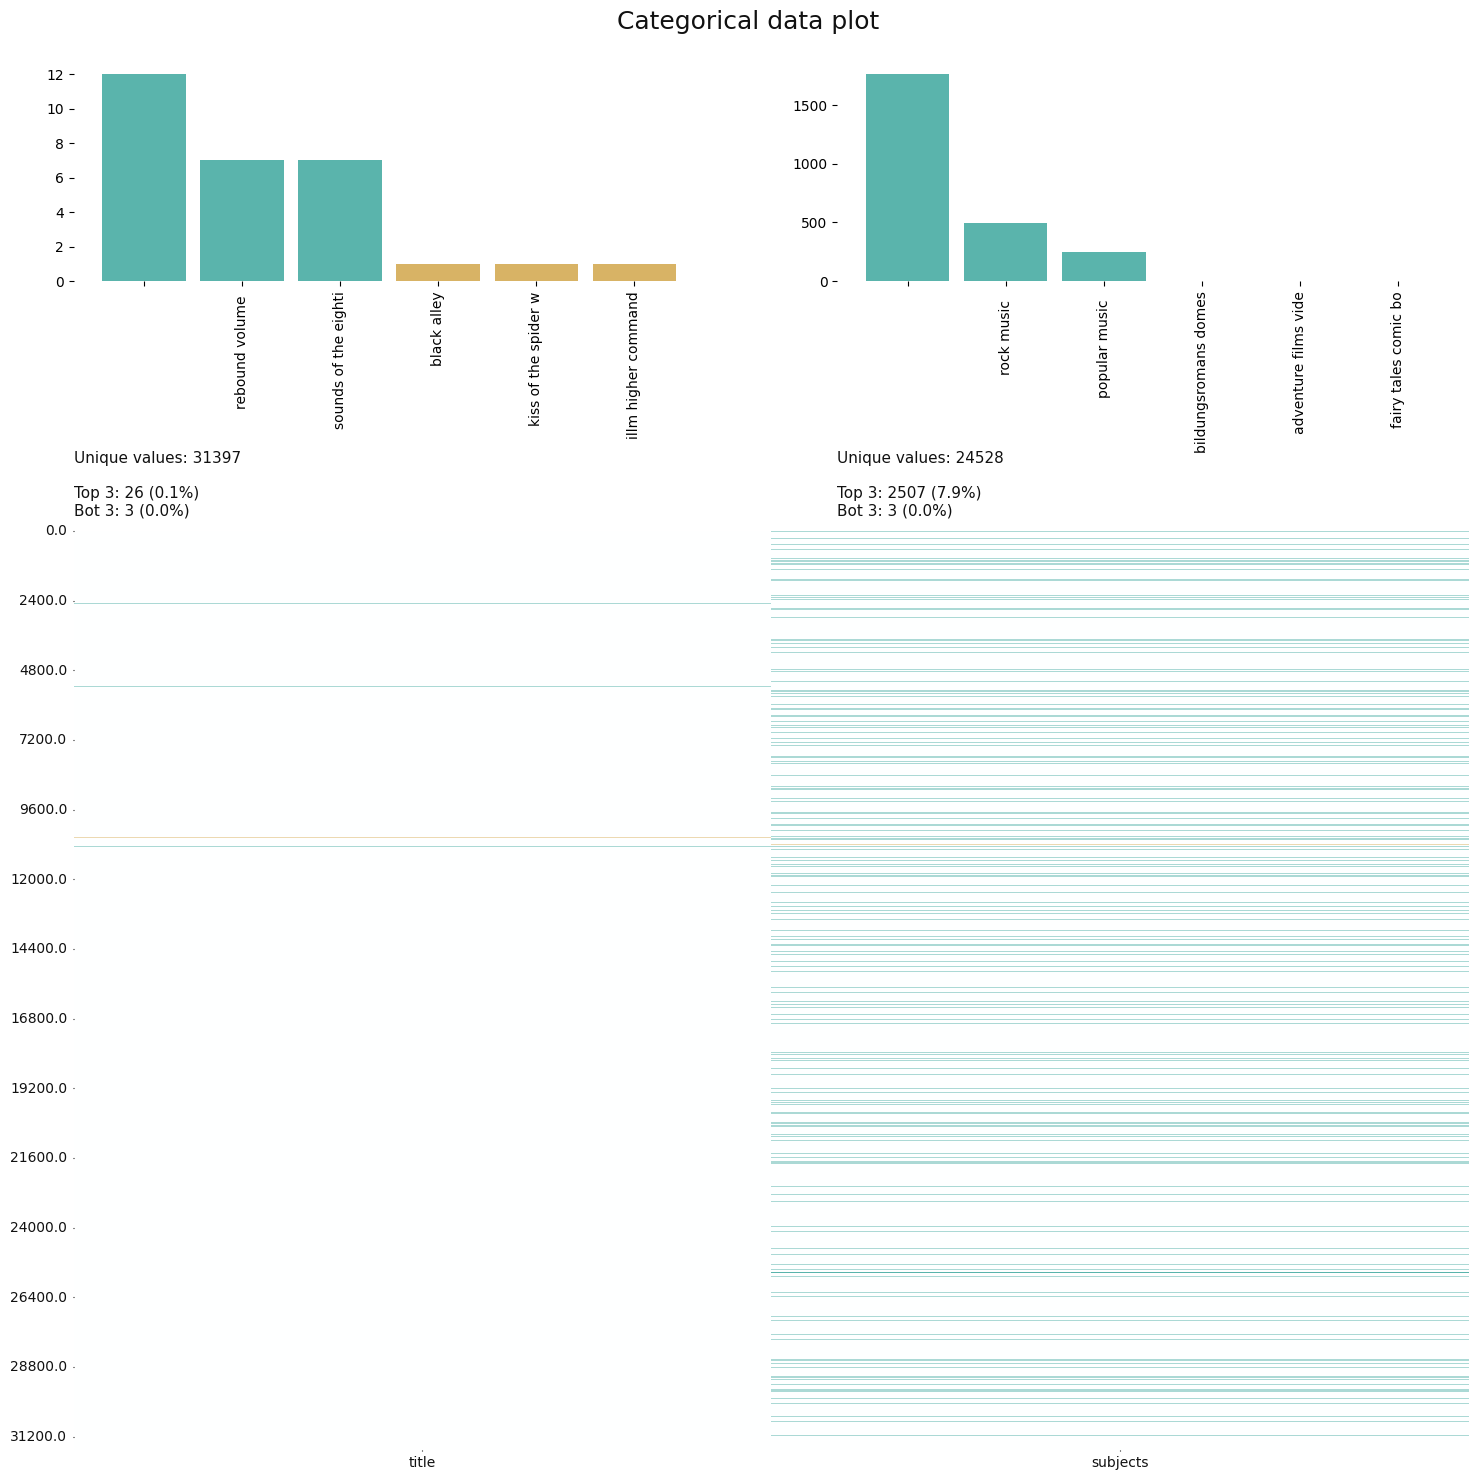

In [68]:
klib.cat_plot(train_data)

In [69]:
###klib.corr_mat(train_data)

In [70]:
##klib.corr_plot(train_data)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='id', ylabel='Density'>

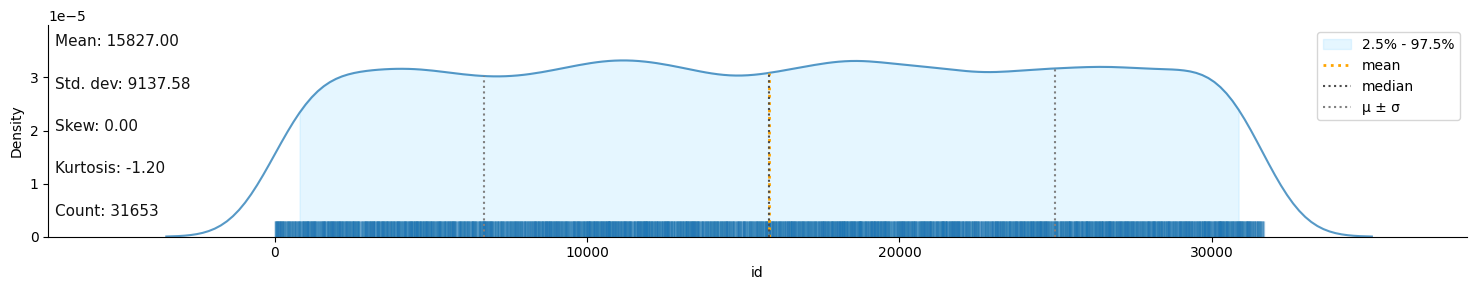

In [71]:
klib.dist_plot(train_data)

In [72]:
klib.missingval_plot(train_data)

No missing values found in the dataset.


In [73]:
test_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'creator', 'subjects', 'publisher',
       'publication_year', 'material_type'],
      dtype='object')

In [74]:
train_data.dtypes

id                   int16
usage_class           int8
checkout_type         int8
checkout_year        int16
checkout_month        int8
checkouts             int8
title               object
subjects            object
publication_year     int64
material_type         int8
dtype: object

In [75]:
train_data["subjects"] = train_data["subjects"].astype('string')

In [76]:
###! pip install pycaret==2.0

In [77]:
import pycaret

In [78]:
from pycaret.nlp import *

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
#import data and preprocess
import pandas as pd
import re
import string
from string import punctuation
from nltk.corpus import stopwords

In [81]:
train_data.dtypes

id                   int16
usage_class           int8
checkout_type         int8
checkout_year        int16
checkout_month        int8
checkouts             int8
title               object
subjects            string
publication_year     int64
material_type         int8
dtype: object

In [82]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') #stopwords for Indonesian

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
cv = CountVectorizer(lowercase = True, stop_words = stop_words, token_pattern="[A-Za-z]+")
BoW = cv.fit_transform(train_data['subjects'])
BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names_out())

In [84]:
BoW_df['target_cat'] = train_data["material_type"]
BoW_df

aa  aardvark  aaron  ab  abadan  abandoned  abandonment  abbas  abbey  \
0       0         0      0   0       0          0            0      0      0   
1       0         0      0   0       0          0            0      0      0   
2       0         0      0   0       0          0            0      0      0   
3       0         0      0   0       0          0            0      0      0   
4       0         0      0   0       0          0            0      0      0   
...    ..       ...    ...  ..     ...        ...          ...    ...    ...   
31648   0         0      0   0       0          0            0      0      0   
31649   0         0      0   0       0          0            0      0      0   
31650   0         0      0   0       0          0            0      0      0   
31651   0         0      0   0       0          0            0      0      0   
31652   0         0      0   0       0          0            0      0      0   

       abbott  abby  abd  abdomen  abdominal  abduction  abdul  abe  abel  \
0           0     0    0        0          0          0      0    0     0   
1           0     0    0        0          0          0      0    0     0   
2           0     0    0        0          0          0      0    0     0   
3           0     0    0        0          0          0      0    0     0   
4           0     0    0        0          0          0      0    0     0   
...       ...   ...  ...      ...        ...        ...    ...  ...   ...   
31648       0     0    0        0          0          0      0    0     0   
31649       0     0    0        0          0          0      0    0     0   
31650       0     0    0        0          0          0      0    0     0   
31651       0     0    0        0          0          0      0    0     0   
31652       0     0    0        0          0          0      0    0     0   

       abigail  ability  abnormalities  abolitionists  aboriginal  abortion  \
0            0        0              0              0           0         0   
1            0        0              0              0           0         0   
2            0        0              0              0           0         0   
3            0        0              0              0           0         0   
4            0        0              0              0           0         0   
...        ...      ...            ...            ...         ...       ...   
31648        0        0              0              0           0         0   
31649        0        0              0              0           0         0   
31650        0        0              0              0           0         0   
31651        0        0              0              0           0         0   
31652        0        0              0              0           0         0   

       abraham  abram  abramovic  absinthe  abstract  absurd  abu  abuse  \
0            0      0          0         0         0       0    0      0   
1            0      0          0         0         0       0    0      0   
2            0      0          0         0         0       0    0      0   
3            0      0          0         0         0       0    0      0   
4            0      0          0         0         0       0    0      0   
...        ...    ...        ...       ...       ...     ...  ...    ...   
31648        0      0          0         0         0       0    0      0   
31649        0      0          0         0         0       0    0      0   
31650        0      0          0         0         0       0    0      0   
31651        0      0          0         0         0       0    0      0   
31652        0      0          0         0         0       0    0      0   

       abused  abusive  academic  academy  accents  accentuation  acceptance  \
0           0        0         0        0        0             0           0   
1           0        0         0        0        0             0           0   
2           0      

In [ ]:
from pycaret.classification import *
setup = setup(data=BoW_df, target='target_cat', session_id=123, silent=True)

INFO:logs:PyCaret Classification Module
INFO:logs:version 2.0
INFO:logs:Initializing setup()
INFO:logs:USI: 4c06
INFO:logs:setup(data=(31653, 13087), target=target_cat, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,
                    high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,
                    normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,
                    pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove_outliers=False, outliers_threshold=0.05,
                    remove_multicollinearity=False, multicollinearity_threshold=0.9, remove_perf

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .                     15:46:04
Status     . . . . . . . . . . . . . . . . . .  Preparing Data for Modeling
ETC        . . . . . . . . . . . . . . . . . .              Calculating ETC

INFO:logs:Importing libraries


INFO:logs:Copying data for preprocessing
INFO:logs:Declaring global variables
INFO:logs:Declaring preprocessing parameters
INFO:logs:Importing preprocessing module
INFO:logs:Creating preprocessing pipeline


In [ ]:
models = compare_models()

In [ ]:
svm = create_model('svm')
plot_model(svm, "confusion_matrix")